# Lec 08. Neural Networks

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.autograd import Variable

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Generating Data

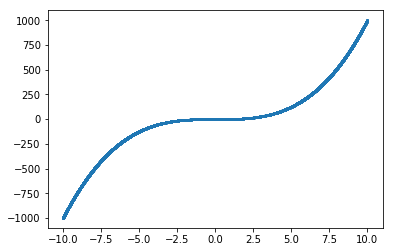

In [3]:
x = torch.linspace(-10, 10, 50000)
y = x.pow(3) + 0.3*torch.rand(x.size())
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy(), y.data.numpy(), s=1)
plt.show()

In [4]:
x.shape, y.shape

(torch.Size([50000]), torch.Size([50000]))

In [5]:
x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)
x.shape, y.shape

(torch.Size([50000, 1]), torch.Size([50000, 1]))

## 2. Build Model

In [6]:
hidden1 = nn.Linear(1, 30, bias=True)
activation1 = nn.ReLU()

hidden2 = nn.Linear(30, 60, bias=True)
activation2 = nn.ReLU()

hidden3 = nn.Linear(60, 20, bias=True)
activation3 = nn.ReLU()

optput = nn.Linear(20, 1, bias=True)

In [7]:
model = nn.Sequential(hidden1, activation1, hidden2, activation2, hidden3, activation3, optput)

loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

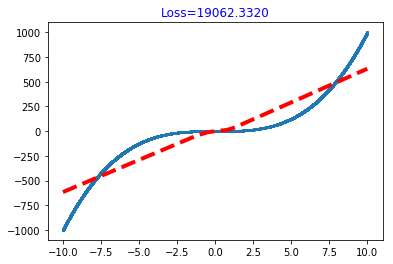

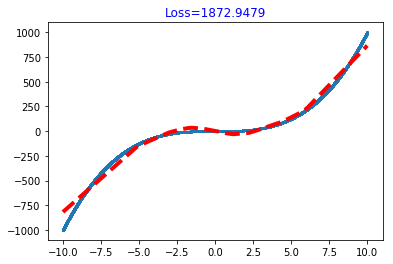

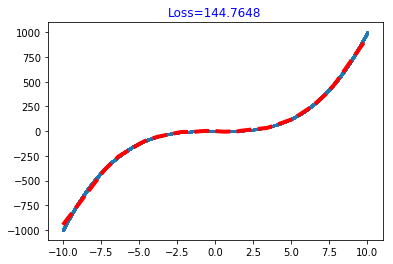

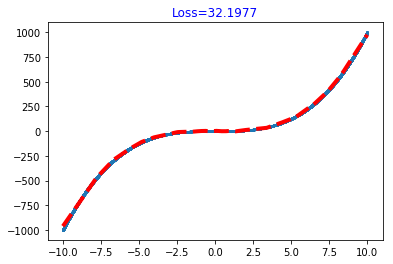

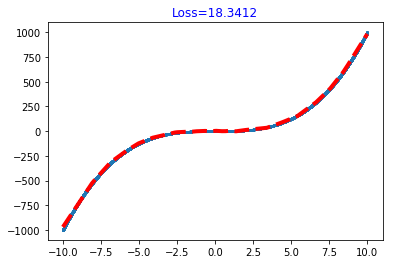

In [8]:
for t in range(500):
    pred = model(x)
    cost = loss(pred, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if (t+1) % 100  == 0:
        plt.scatter(x.data.numpy(), y.data.numpy(), s=1)
        plt.plot(x.data.numpy(), pred.data.numpy(), 'r--', lw=4)
        plt.title('Loss=%.4f' % cost.item(), fontdict={'size':12, 'color':'b'})
        plt.show()